# Self-Driving Car Engineer Nanodegree

## Deep Learning

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


---
# Load The Data

In [1]:
# Load pickled data
import pickle
import pandas as pd
# TODO: Fill this in based on where you saved the training and testing data

training_file   = "../data/train.p"
validation_file = "../data/valid.p"
testing_file    = "../data/test.p"
labels_file     = "signnames.csv"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

labels = pd.read_csv(labels_file, index_col='SignName')
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test , y_test  = test['features'] , test['labels']

print("done..")

done..


---

# Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**


In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of validation examples
n_validation = len(X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(labels)

print("Number of training examples =", n_train)
print("Number of valid examples   =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of valid examples   = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


# An exploratory visualization of the dataset

In [3]:
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

import random
import numpy as np

### Training Images

Number of training examples = 34799


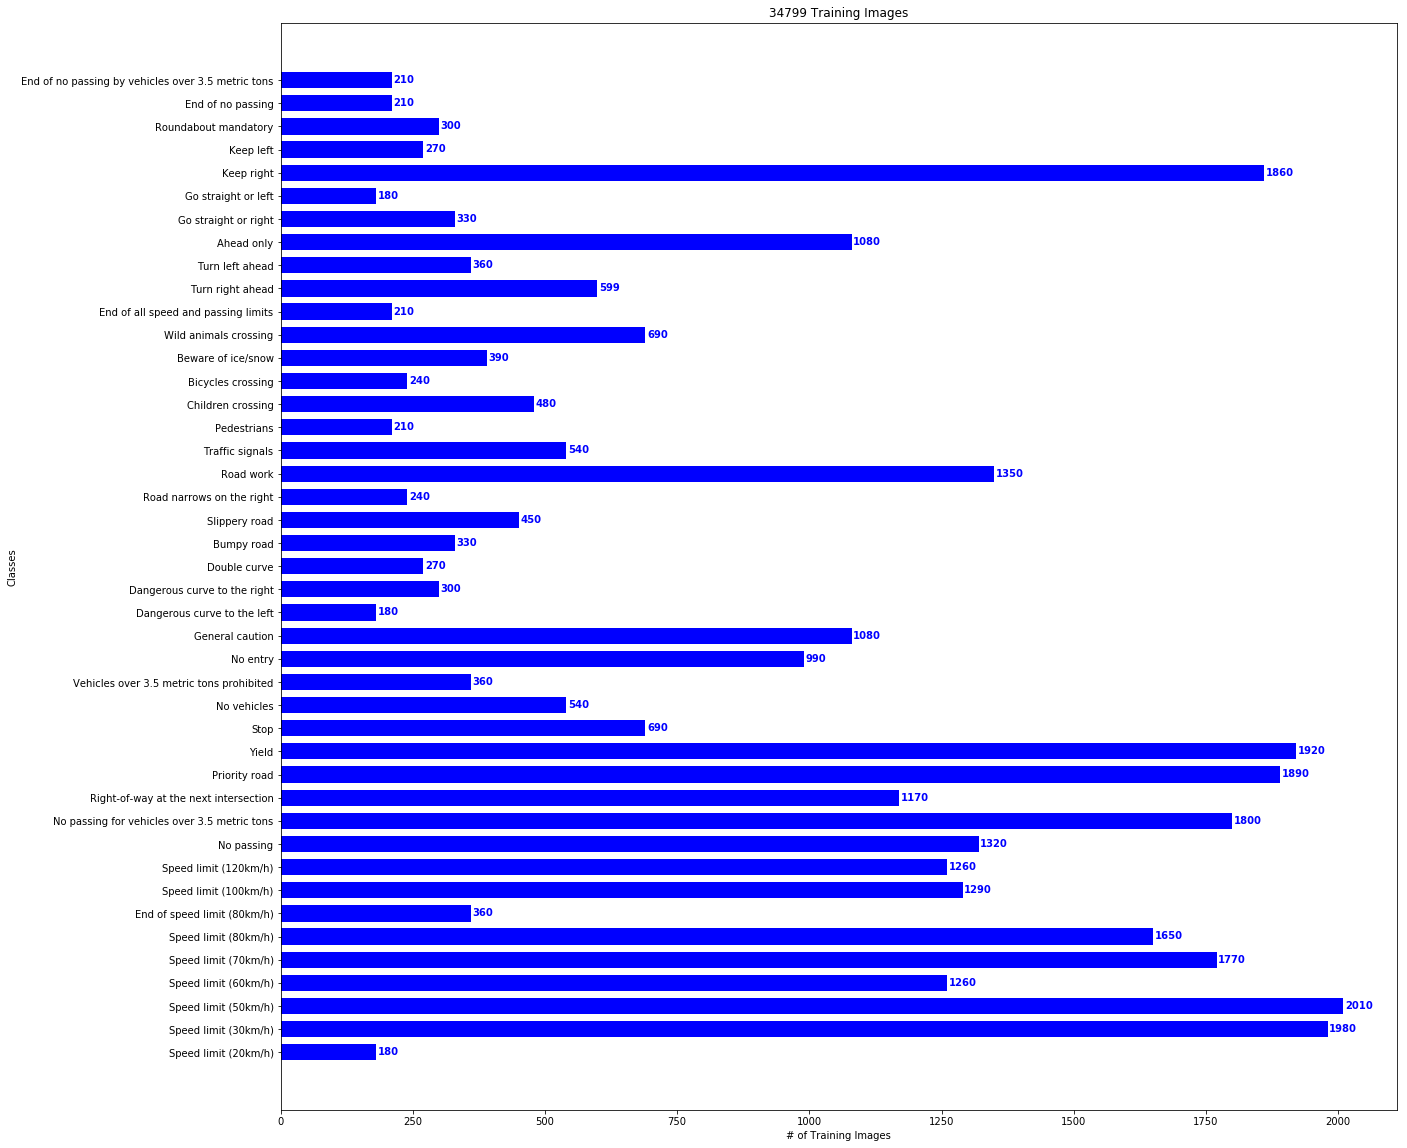

In [4]:
print("Number of training examples =", n_train)

# histogram of label frequency
hist, bins = np.histogram(y_train, bins=n_classes)

fig, ax = plt.subplots(figsize=(20,20))    
width = 0.7 # the width of the bars 
ind = np.arange(n_classes)  # the x locations for the groups
ax.barh(ind, hist, width, align='edge',color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(labels.index, minor=False)
for i, v in enumerate(hist):
    ax.text(v + 3, i + .25, str(v), color='blue', fontweight='bold')
plt.title(str(n_train) + ' Training Images')
plt.xlabel('# of Training Images')
plt.ylabel('Classes')
plt.show()

### Validation Images

Number of valid examples   = 4410


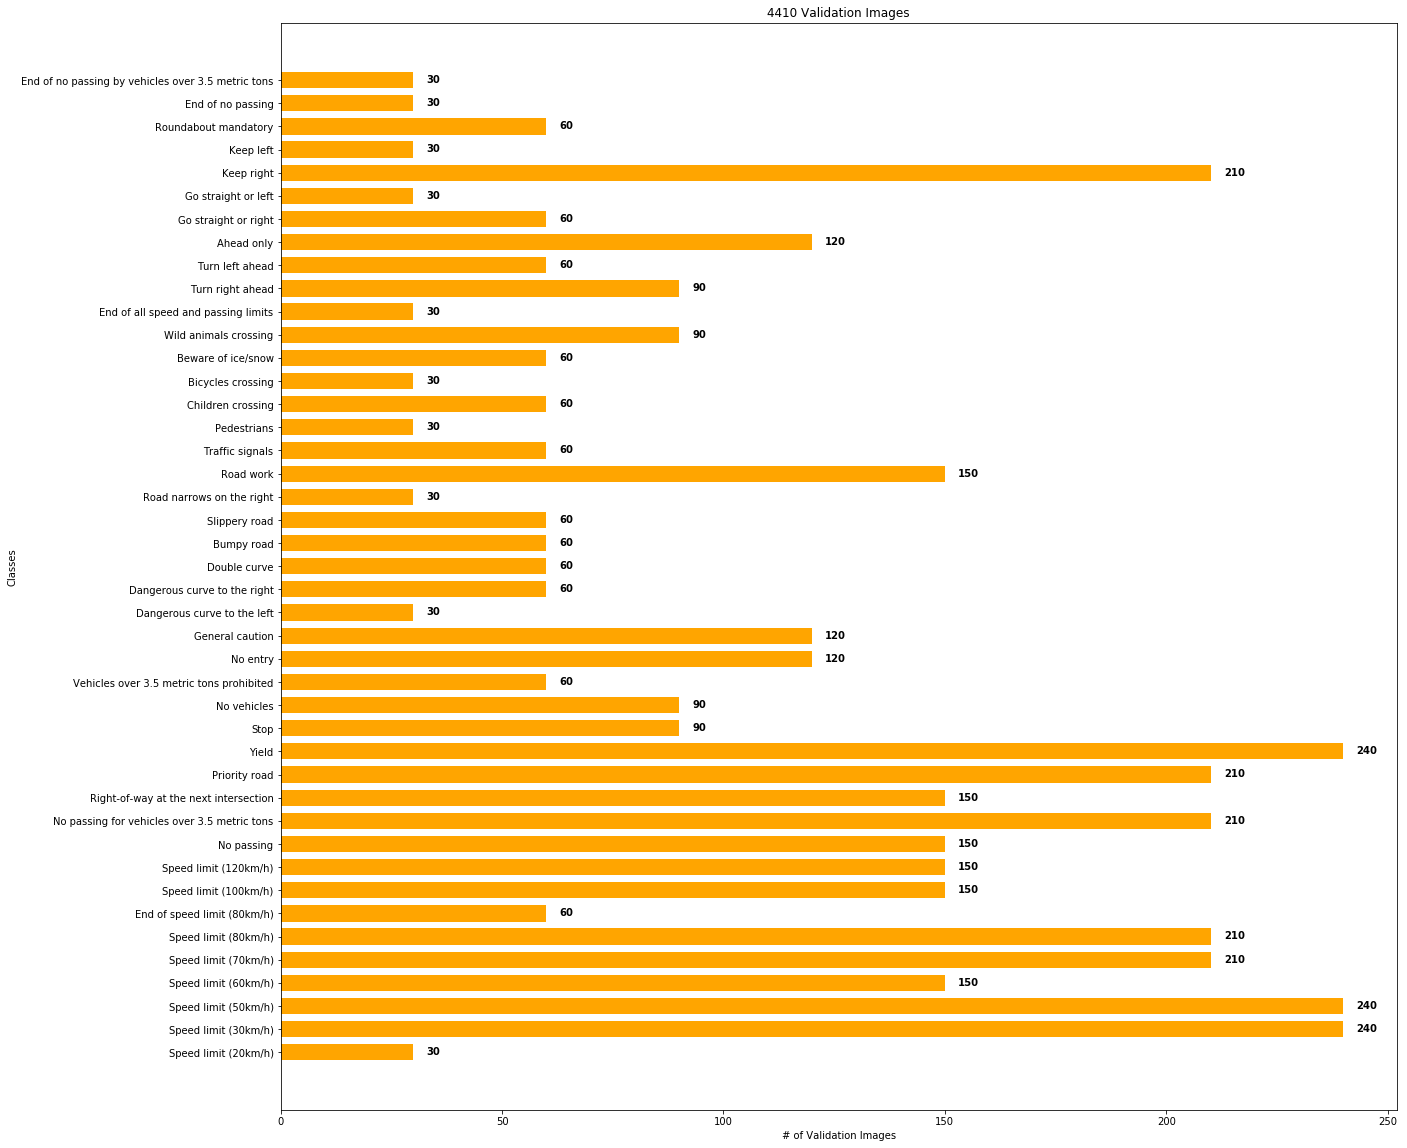

In [5]:
print("Number of valid examples   =", n_validation)

# histogram of label frequency
hist, bins = np.histogram(y_valid, bins=n_classes)

fig, ax = plt.subplots(figsize=(20,20))    
width = 0.7 # the width of the bars 
ind = np.arange(n_classes)  # the x locations for the groups
ax.barh(ind, hist, width, align='edge',color="orange")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(labels.index, minor=False)
for i, v in enumerate(hist):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
plt.title(str(n_validation) + ' Validation Images')
plt.xlabel('# of Validation Images')
plt.ylabel('Classes')
plt.show()

### Test Images

Number of testing examples = 12630


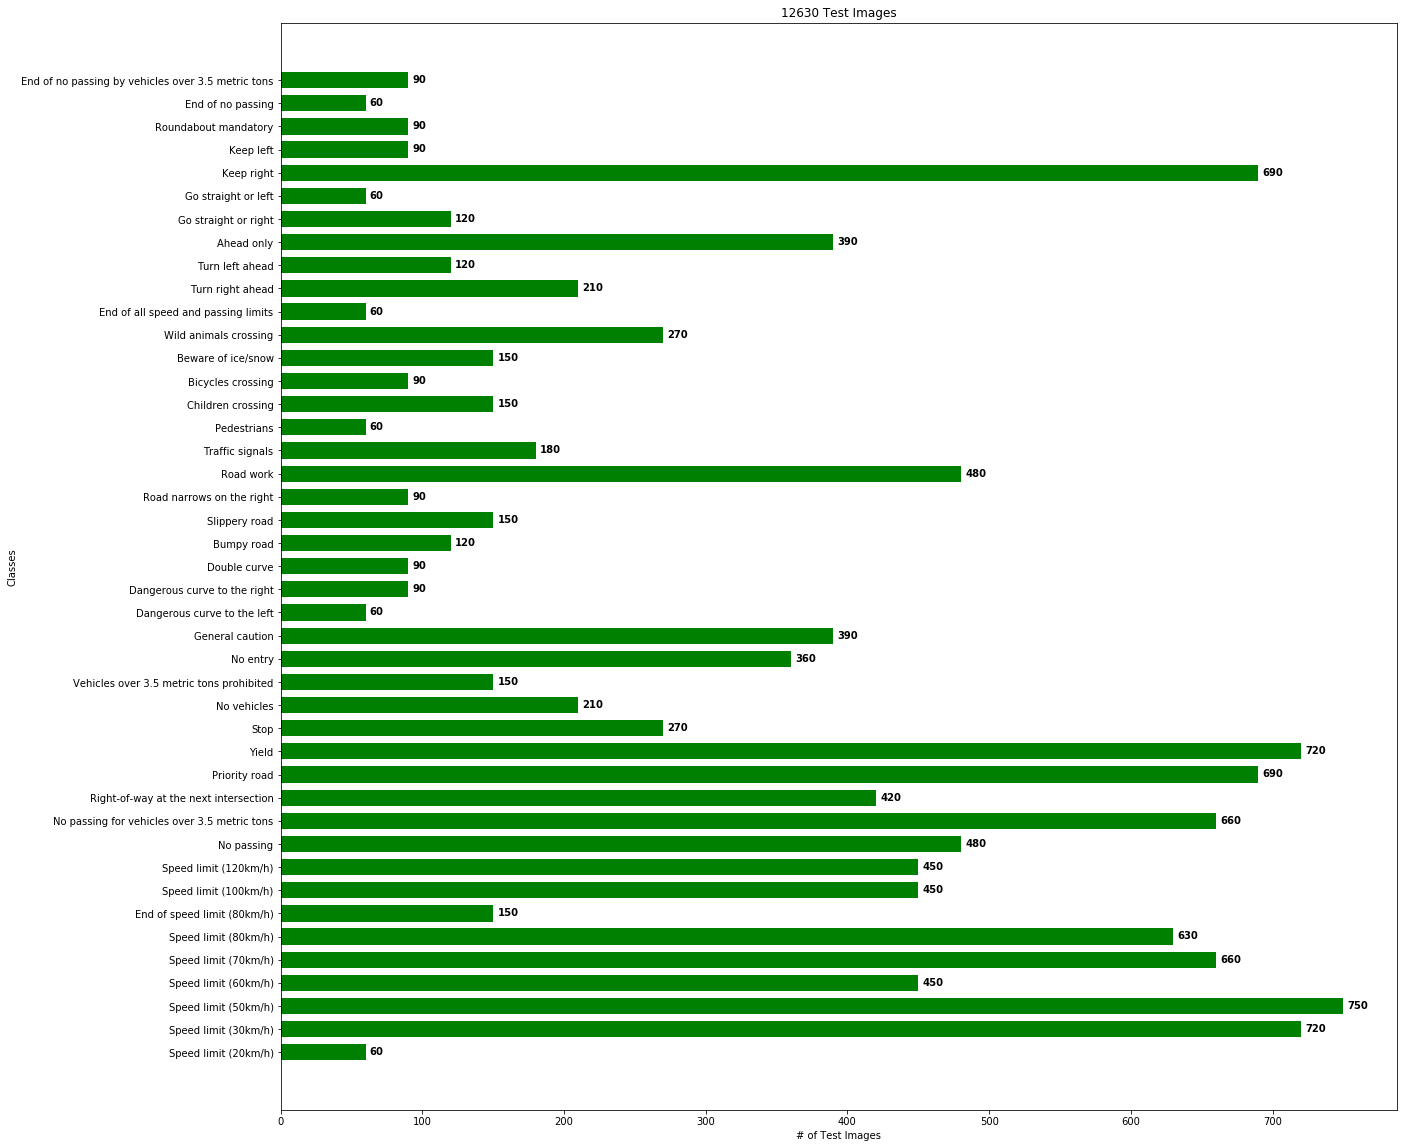

In [6]:
print("Number of testing examples =", n_test)

# histogram of label frequency
hist, bins = np.histogram(y_test, bins=n_classes)

fig, ax = plt.subplots(figsize=(20,20))    
width = 0.7 # the width of the bars 
ind = np.arange(n_classes)  # the x locations for the groups
ax.barh(ind, hist, width, align='edge',color="green")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(labels.index, minor=False)
for i, v in enumerate(hist):
    ax.text(v + 3, i + .25, str(v), color='black', fontweight='bold')
plt.title(str(n_test) + ' Test Images')
plt.xlabel('# of Test Images')
plt.ylabel('Classes')
plt.show()

Image data shape = (32, 32, 3)


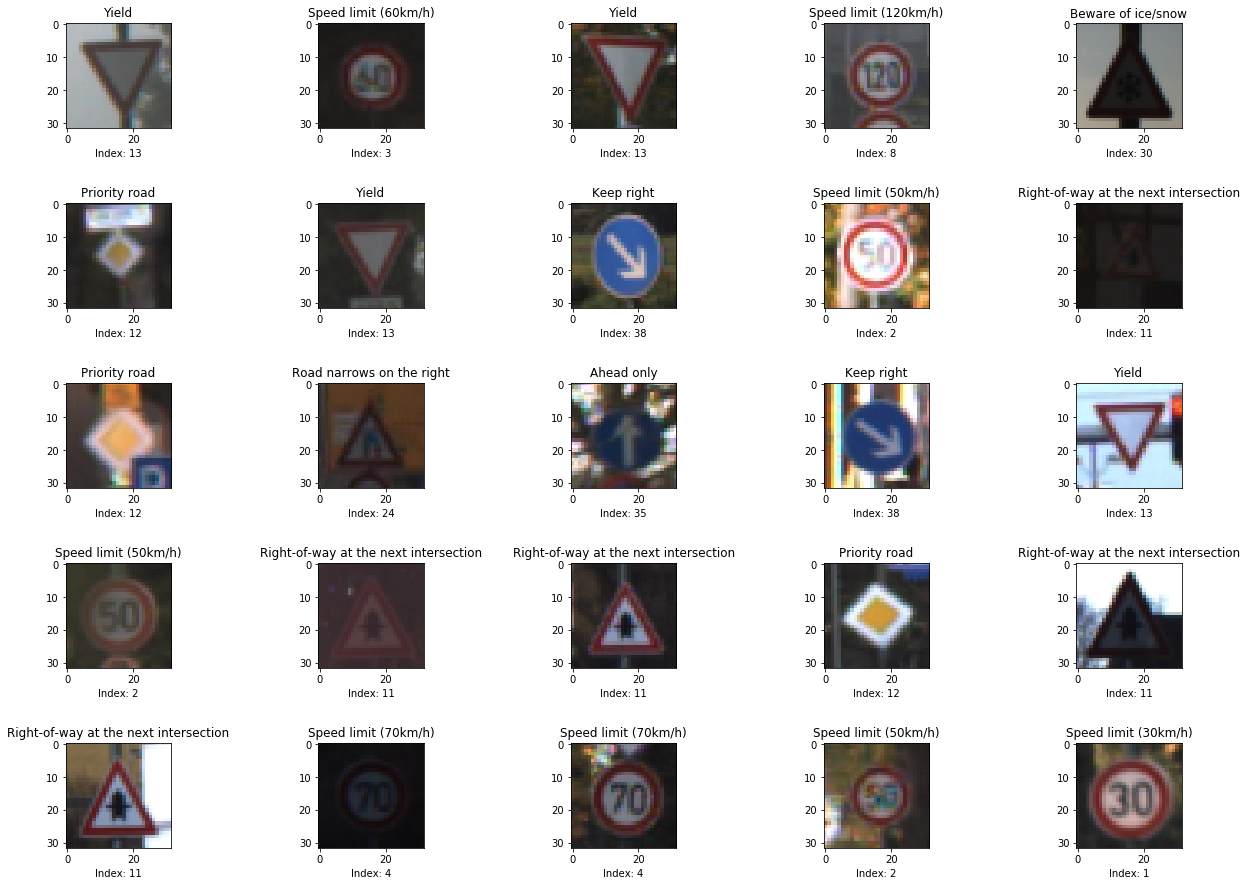

In [7]:
print("Image data shape =", image_shape)


fig, axs = plt.subplots(5,5, figsize=(20, 16))
fig.subplots_adjust(hspace = .2, wspace=1.4)
axs = axs.ravel()

for i in range(25):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    #axs[i].axis('off')
    axs[i].imshow(image)
    axs[i].set_title(labels.index[y_train[index]], color = "black",fontsize=12)
    axs[i].set_xlabel("Index: " + str(y_train[index]))


# Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 


### NOTE
Given the use of small weights in the model and the use of error between predictions and expected values, the scale of inputs and outputs used to train the model are an important factor. Unscaled input variables can result in a slow or unstable learning process, whereas unscaled target variables on regression problems can result in exploding gradients causing the learning process to fail.

Data preparation involves using techniques such as the normalization and standardization to rescale input and output variables prior to training a neural network model.
https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/

In [4]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
def normalize_grayscale(image_data):
    """
    Normalize the image data
    :param image_data: The image data to be normalized
    :return: Normalized image data
    """
    image_data_gry = np.sum(image_data/3, axis=3, keepdims=True)
    image_data_normalized = (image_data_gry - 128)/128 
    return image_data_normalized

# summarize pixel values
print('Summarize pixel values:')
print('Train min: {0} max: {1} mean: {2:.4f} std: {3:.4f}'.format(X_train.min(), X_train.max(), X_train.mean(), X_train.std()))
print('Test min : {0} max: {1} mean: {2:.4f} std: {3:.4f}'.format(X_test.min(), X_test.max(), X_test.mean(), X_test.std()))

X_train = normalize_grayscale(X_train)
X_test = normalize_grayscale(X_test)
X_valid = normalize_grayscale(X_valid)

print('After normalizing:')
print('Train min: {0} max: {1} mean: {2:.4f} std: {3:.4f}'.format(X_train.min(), X_train.max(), X_train.mean(), X_train.std()))
print('Test min : {0} max: {1} mean: {2:.4f} std: {3:.4f}'.format(X_test.min(), X_test.max(), X_test.mean(), X_test.std()))

print('Train images shape: {0} Test img {1} Validation img {2}'.format(X_train[0].shape, X_test[0].shape,X_valid[0].shape))

Summarize pixel values:
Train min: 0 max: 255 mean: 82.6776 std: 67.8509
Test min : 0 max: 255 mean: 82.1485 std: 68.7441
After normalizing:
Train min: -0.9713541666666666 max: 0.9921875 mean: -0.3541 std: 0.5157
Test min : -0.96875 max: 0.9921875 mean: -0.3582 std: 0.5216
Train images shape: (32, 32, 1) Test img (32, 32, 1) Validation img (32, 32, 1)


# Creating images for low count labels

(32, 32, 1)
Original


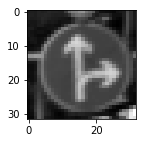

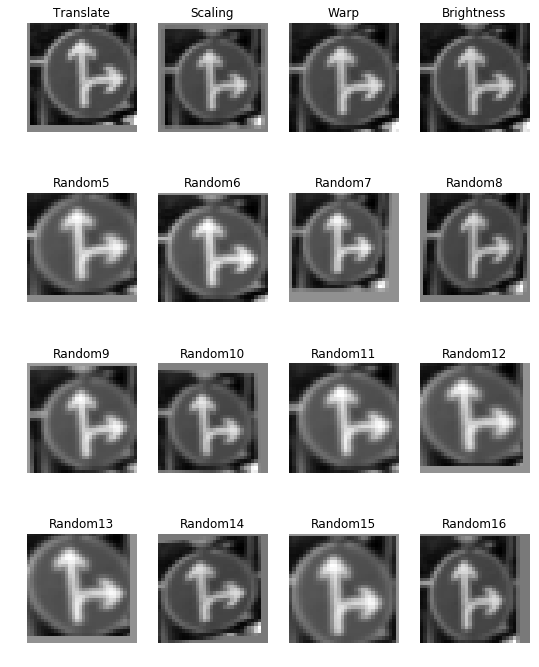

In [9]:
import cv2

imageEx = X_train[1220]
print(imageEx.shape)

def random_translate(img):
    rows,cols,_ = img.shape
    
    # allow translation up to px pixels in x and y directions
    px = 2
    dx,dy = np.random.randint(-px,px,2)

    M = np.float32([[1,0,dx],[0,1,dy]])
    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

def random_scaling(img):   
    rows,cols,_ = img.shape

    # transform limits
    px = np.random.randint(-2,2)

    # ending locations
    pts1 = np.float32([[px,px],[rows-px,px],[px,cols-px],[rows-px,cols-px]])

    # starting locations (4 corners)
    pts2 = np.float32([[0,0],[rows,0],[0,cols],[rows,cols]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    dst = cv2.warpPerspective(img,M,(rows,cols))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

def random_warp(img):
    
    rows,cols,_ = img.shape

    # random scaling coefficients
    rndx = np.random.rand(3) - 0.5
    rndx *= cols * 0.06   # this coefficient determines the degree of warping
    rndy = np.random.rand(3) - 0.5
    rndy *= rows * 0.06

    # 3 starting points for transform, 1/4 way from edges
    x1 = cols/4
    x2 = 3*cols/4
    y1 = rows/4
    y2 = 3*rows/4

    pts1 = np.float32([[y1,x1],
                       [y2,x1],
                       [y1,x2]])
    pts2 = np.float32([[y1+rndy[0],x1+rndx[0]],
                       [y2+rndy[1],x1+rndx[1]],
                       [y1+rndy[2],x2+rndx[2]]])

    M = cv2.getAffineTransform(pts1,pts2)

    dst = cv2.warpAffine(img,M,(cols,rows))
    
    dst = dst[:,:,np.newaxis]
    
    return dst

def random_brightness(img):
    shifted = img + 1.0   # shift to (0,2) range
    img_max_value = max(shifted.flatten())
    max_coef = 2.0/img_max_value
    min_coef = max_coef - 0.1
    coef = np.random.uniform(min_coef, max_coef)
    dst = shifted * coef - 1.0
    return dst

def plotImageCreated(img, mode, r, c, i):
    plt.subplot(r,c,i)    
    plt.imshow(img.squeeze(),cmap = 'gray')
    plt.title(mode)
    plt.axis("off")


print("Original")
plt.figure(figsize=(2,2))
plt.imshow(imageEx.squeeze(), cmap="gray")


plt.figure(figsize=(9,12))
r=4
c=4

plotImageCreated(random_translate(np.copy(imageEx)), "Translate", r,c,1)
plotImageCreated(random_scaling(np.copy(imageEx)), "Scaling", r,c,2)
plotImageCreated(random_warp(np.copy(imageEx)), "Warp", r,c,3)
plotImageCreated(random_brightness(np.copy(imageEx)), "Brightness", r,c,4)
for i in range(5,17):
    plotImageCreated(random_translate(random_scaling(random_warp(random_brightness(np.copy(imageEx))))), "Random"+str(i), r,c,i)

plt.show()

Number of images per labels before creating images


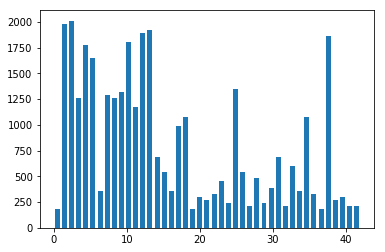

creating images...
Creating 620 random images for label Speed limit (20km/h)
Creating 440 random images for label End of speed limit (80km/h)
Creating 110 random images for label Stop
Creating 260 random images for label No vehicles
Creating 440 random images for label Vehicles over 3.5 metric tons prohibited
Creating 620 random images for label Dangerous curve to the left
Creating 500 random images for label Dangerous curve to the right
Creating 530 random images for label Double curve
Creating 470 random images for label Bumpy road
Creating 350 random images for label Slippery road
Creating 560 random images for label Road narrows on the right
Creating 260 random images for label Traffic signals
Creating 590 random images for label Pedestrians
Creating 320 random images for label Children crossing
Creating 560 random images for label Bicycles crossing
Creating 410 random images for label Beware of ice/snow
Creating 110 random images for label Wild animals crossing
Creating 590 random

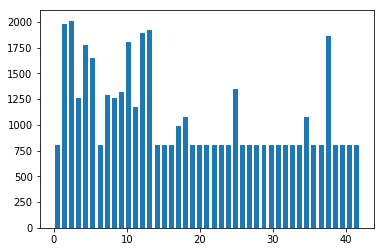

In [10]:
print("Number of images per labels before creating images")

# histogram of label frequency (once again, before data augmentation)
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()


input_indices = []
output_indices = []

print("creating images...")

for class_n in range(n_classes):    
    class_indices = np.where(y_train == class_n)
    n_samples = len(class_indices[0])
    if n_samples < 800:
        print("Creating {0} random images for label {1}".format(800 - n_samples,labels.index[class_n]))
        for i in range(800 - n_samples):
            input_indices.append(class_indices[0][i%n_samples])
            output_indices.append(X_train.shape[0])
            new_img = X_train[class_indices[0][i % n_samples]]
            new_img = random_translate(random_scaling(random_warp(random_brightness(new_img))))
            X_train = np.concatenate((X_train, [new_img]), axis=0)
            y_train = np.concatenate((y_train, [class_n]), axis=0)
print("done..") 
print("Training samples after creating images...")            
            
# histogram of label frequency (once again, before data augmentation)
hist, bins = np.histogram(y_train, bins=n_classes)
width = 0.7 * (bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2
plt.bar(center, hist, align='center', width=width)
plt.show()            

In [12]:
#Save all this data because it takes a lot...
SAVE_GENERATED_IMAGES = True

if(SAVE_GENERATED_IMAGES == True):
    output = open('X_trainPlusRandomImg.pkl', 'wb')
    pickle.dump(X_train, output)
    output.close()

    output = open('y_trainPlusRandomImg.pkl', 'wb')
    pickle.dump(y_train, output)
    output.close()


In [ ]:
READ_GENERATED_IMAGES = False

if(READ_GENERATED_IMAGES == True):
    #Read the images we generated in the past
    X_train_file = open('X_trainPlusRandomImg.pkl', 'rb')
    X_train = pickle.load(X_train_file)
    X_train_file.close()

    y_train_file = open('y_trainPlusRandomImg.pkl', 'rb')
    y_train = pickle.load(y_train_file)
    y_train_file.close()

----

# Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

In [5]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

print("done...")

done...


## Setup TensorFlow
The EPOCH and BATCH_SIZE values affect the training speed and model accuracy.

In [6]:
import tensorflow as tf

### Model Architecture ORIGINAL

In [7]:
### Define your architecture here.
from tensorflow.contrib.layers import flatten

def LeNet__ORIGINAL(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    #5x5Filter, Input depth=1, Output depth=6
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    #Output Height= (Input Height - FilterHeight + 1)/Vertical stride=(32 - 5 + 1)/1 = 28
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    #Kernel = 2x2 , Stride = 2x2
    #Output Height= (Input Height - FilterHeight + 1)/Vertical stride=(28 - 1 + 1)/2 = 14
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    #5x5Filter, Input depth=6, Output depth=16
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    #Output Height= (Input Height - FilterHeight + 1)/Vertical stride=(14 - 5 + 1)/1 = 10
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)

    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Model Architecture

In [8]:
from tensorflow.contrib.layers import flatten

def LeNet(x):
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # TODO: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    W1 = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma), name="W1")
    x = tf.nn.conv2d(x, W1, strides=[1, 1, 1, 1], padding='VALID')
    b1 = tf.Variable(tf.zeros(6), name="b1")
    x = tf.nn.bias_add(x, b1)
    print("layer 1 shape:",x.get_shape())

    # TODO: Activation.
    x = tf.nn.relu(x)
    
    # TODO: Pooling. Input = 28x28x6. Output = 14x14x6.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer1 = x
    
    # TODO: Layer 2: Convolutional. Output = 10x10x16.
    W2 = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma), name="W2")
    x = tf.nn.conv2d(x, W2, strides=[1, 1, 1, 1], padding='VALID')
    b2 = tf.Variable(tf.zeros(16), name="b2")
    x = tf.nn.bias_add(x, b2)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)

    # TODO: Pooling. Input = 10x10x16. Output = 5x5x16.
    x = tf.nn.max_pool(x, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    layer2 = x
    
    # TODO: Layer 3: Convolutional. Output = 1x1x400.
    W3 = tf.Variable(tf.truncated_normal(shape=(5, 5, 16, 400), mean = mu, stddev = sigma), name="W3")
    x = tf.nn.conv2d(x, W3, strides=[1, 1, 1, 1], padding='VALID')
    b3 = tf.Variable(tf.zeros(400), name="b3")
    x = tf.nn.bias_add(x, b3)
                     
    # TODO: Activation.
    x = tf.nn.relu(x)
    layer3 = x

    # TODO: Flatten. Input = 5x5x16. Output = 400.
    layer2flat = flatten(layer2)
    print("layer2flat shape:",layer2flat.get_shape())
    
    # Flatten x. Input = 1x1x400. Output = 400.
    xflat = flatten(x)
    print("xflat shape:",xflat.get_shape())
    
    # Concat layer2flat and x. Input = 400 + 400. Output = 800
    #x = tf.concat_v2([xflat, layer2flat], 1)
    x = tf.concat([xflat, layer2flat],1)
    print("x shape:",x.get_shape())
    
    # Dropout
    x = tf.nn.dropout(x, dropout_rate)
    
    # TODO: Layer 4: Fully Connected. Input = 800. Output = 43.
    W4 = tf.Variable(tf.truncated_normal(shape=(800, 43), mean = mu, stddev = sigma), name="W4")
    b4 = tf.Variable(tf.zeros(43), name="b4")    
    logits = tf.add(tf.matmul(x, W4), b4)
    
    return logits

print("Done..")


Done..


# Features and Labels
Train LeNet to classify MNIST data.

x is a placeholder for a batch of input images. y is a placeholder for a batch of output labels.

In [9]:
x = tf.placeholder(tf.float32, (None, 32, 32, 1))#3
y = tf.placeholder(tf.int32, (None))
dropout_rate = tf.placeholder(tf.float32) # probability to keep units
one_hot_y = tf.one_hot(y, 43)

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
### Train your model here.
EPOCHS = 60#30
BATCH_SIZE = 100#256

rate = 0.0009#0.004

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

layer 1 shape: (?, 28, 28, 6)
layer2flat shape: (?, 400)
xflat shape: (?, 400)
x shape: (?, 800)


In [11]:
### Calculate and report the accuracy on the training and validation set.

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, dropout_rate: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [29]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...EPOCHS: {0} BATCH_SIZE: {1} rate: {2} Iterations: {3}".format(EPOCHS,BATCH_SIZE,rate,num_examples/BATCH_SIZE))
    
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, dropout_rate: 0.5})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...EPOCHS: 60 BATCH_SIZE: 100 rate: 0.0009 Iterations: 464.8

EPOCH 1 ...
Validation Accuracy = 0.775

EPOCH 2 ...
Validation Accuracy = 0.846

EPOCH 3 ...
Validation Accuracy = 0.883

EPOCH 4 ...
Validation Accuracy = 0.893

EPOCH 5 ...
Validation Accuracy = 0.905

EPOCH 6 ...
Validation Accuracy = 0.907

EPOCH 7 ...
Validation Accuracy = 0.905

EPOCH 8 ...
Validation Accuracy = 0.910

EPOCH 9 ...
Validation Accuracy = 0.912

EPOCH 10 ...
Validation Accuracy = 0.920

EPOCH 11 ...
Validation Accuracy = 0.922

EPOCH 12 ...
Validation Accuracy = 0.916

EPOCH 13 ...
Validation Accuracy = 0.915

EPOCH 14 ...
Validation Accuracy = 0.920

EPOCH 15 ...
Validation Accuracy = 0.929

EPOCH 16 ...
Validation Accuracy = 0.930

EPOCH 17 ...
Validation Accuracy = 0.936

EPOCH 18 ...
Validation Accuracy = 0.933

EPOCH 19 ...
Validation Accuracy = 0.925

EPOCH 20 ...
Validation Accuracy = 0.930

EPOCH 21 ...
Validation Accuracy = 0.934

EPOCH 22 ...
Validation Accuracy = 0.931

EPOCH 23 ...
Va

## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

In [35]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 0.931


---

# Test a Model on New Images

I tool pictures from the [German traffic signs website](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset) to predict the traffic sign type.
All images are down-sampled or upsampled to 32x32 (dataset samples sizes vary from 15x15 to 250x250)




You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

(32, 32, 3)


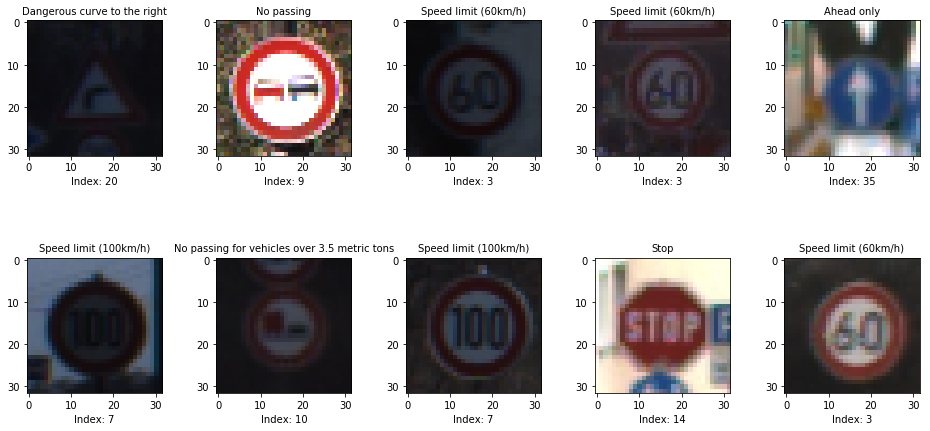

In [12]:
### Load the images and plot them here.
from PIL import Image
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
import numpy as np

import os 
import cv2 
from glob import glob

fig, axs = plt.subplots(2,5, figsize=(16, 8))
fig.subplots_adjust(hspace = .2, wspace=.4)
axs = axs.ravel()

german_images = []
#Dangerous Curve to the right 20
#Speed limit 100Km/h 7
#Speed limit 60Km/h 3
#Stop 14
#Ahead only 35
#No passing for vehicles over 3.5 metric tons 10
#No passing 9
german_labels = [20,9,3,3,35,7,10,7,14,3]
#german_labels = [20,7,3,3,14,35,7,10,9,3]

size = (32, 32)

for i, img in enumerate(glob('GERMAN_IMG_DATABASE/0000*.ppm')):
    image = cv2.imread(img)    
    
    #Not all images are 32x32
    image = cv2.resize(image,size)
    #print('Resized Dimensions : ',image.shape)    
    german_images.append(image)
    
    axs[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[i].set_title(labels.index[german_labels[i]], color = "black",fontsize=10)
    axs[i].set_xlabel("Index: " + str(german_labels[i]))

   
print(german_images[0].shape)


# Predict the Sign Type for Each Image

### Analyze Performance

In [13]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.

#import tensorflow as tf

german_images_normalized = np.copy(german_images)
german_images_normalized = np.asarray(german_images_normalized)
#Gray scale
german_images_normalized = np.sum(german_images_normalized/3, axis=3, keepdims=True)
#Normalize them
german_images_normalized = (german_images_normalized - 128)/128 

### Calculate the accuracy for these 5 new images. 
with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(german_images_normalized, german_labels)
    print("Test Accuracy = {:.3f}".format(test_accuracy))
            

INFO:tensorflow:Restoring parameters from ./lenet
Test Accuracy = 1.000


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

INFO:tensorflow:Restoring parameters from ./lenet


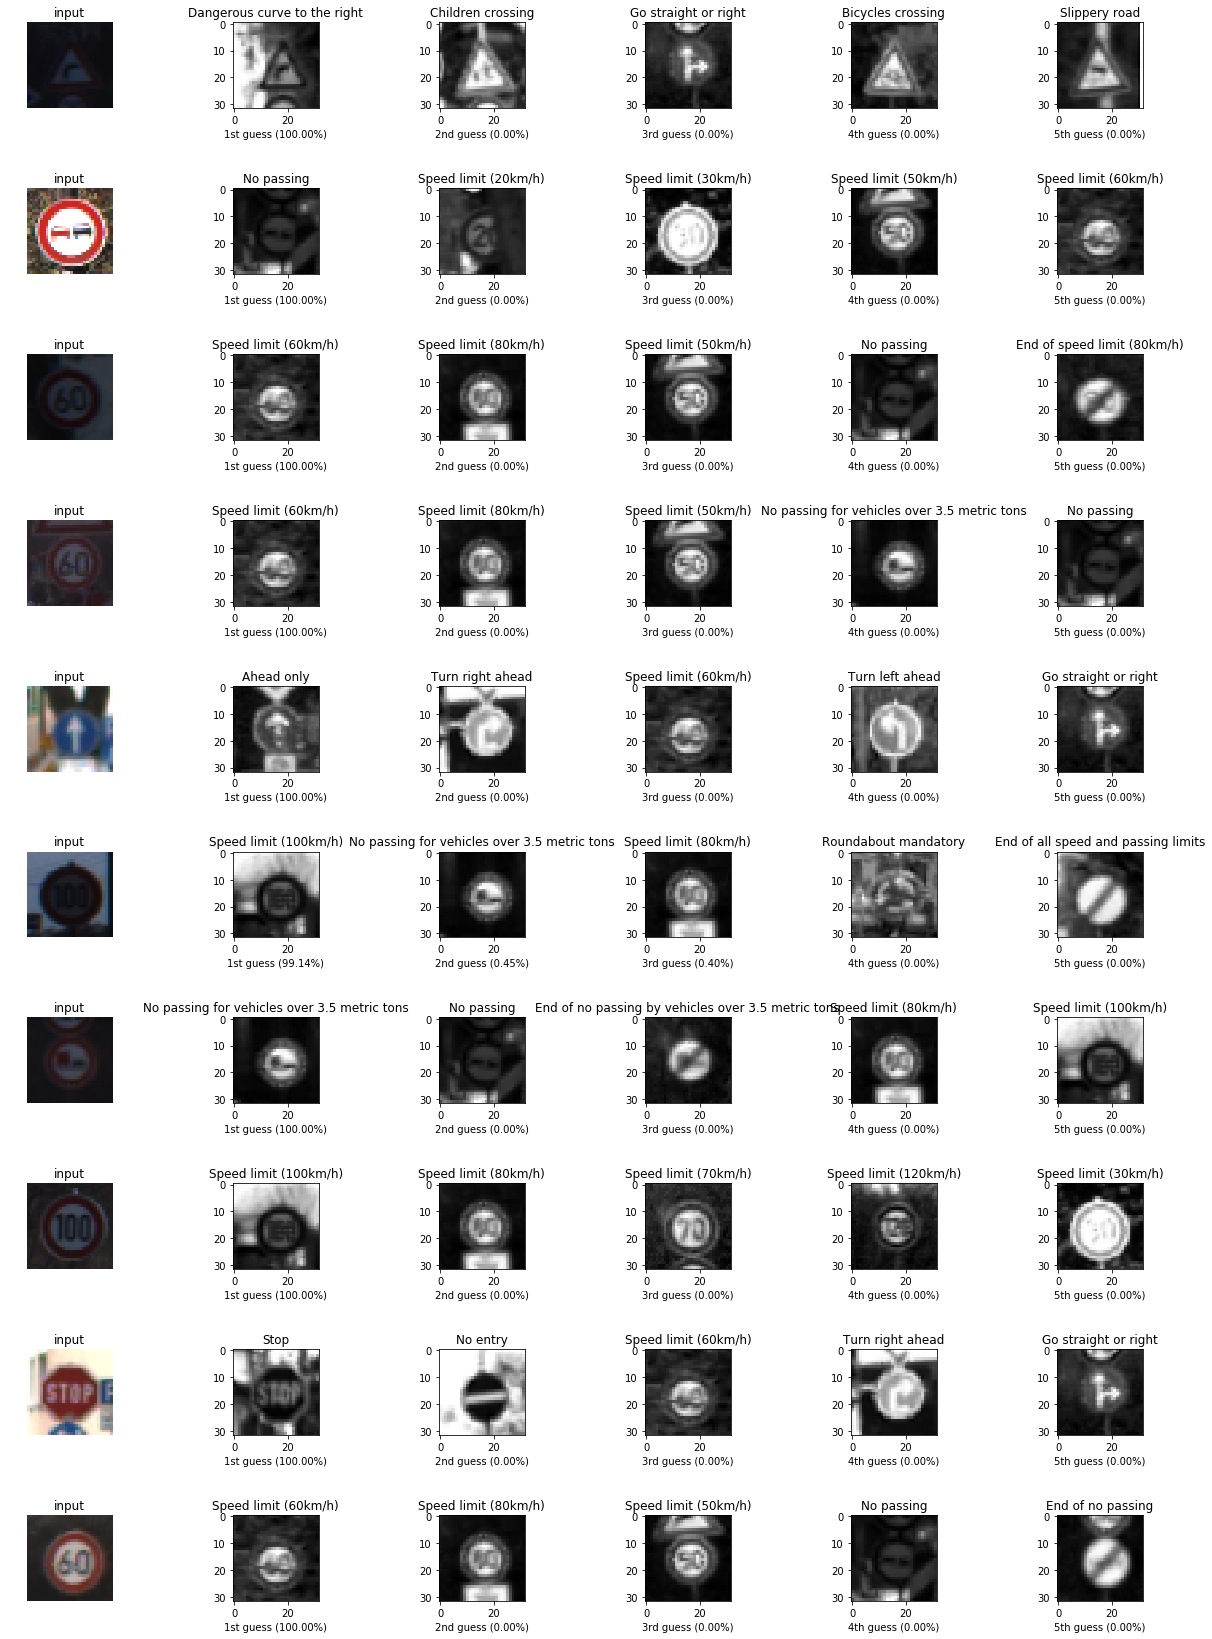

In [19]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)


with tf.Session() as sess:
    #sess.run(tf.global_variables_initializer())
    #saverProb = tf.train.import_meta_graph('./lenet.meta')
    #saverProb.restore(sess, "./lenet")
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    
    
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: german_images_normalized, dropout_rate: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: german_images_normalized, dropout_rate: 1.0})

    
    fig, axs = plt.subplots(len(german_images),6, figsize=(20, 30))
    fig.subplots_adjust(hspace = .2, wspace=1.4)
    axs = axs.ravel()

    for i, image in enumerate(german_images):
        #Show the original image from the German galery
        axs[6*i].axis('off')
        axs[6*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[6*i].set_title('input')
        
        #Get TOP index (class id index)
        guess1 = my_top_k[1][i][0]
        
        #Choose an image index from y_valid array that matches the class id index
        index1 = np.argwhere(y_valid == guess1)[0]
        
        #Show an image that represents the class id guess
        #axs[6*i+1].axis('off')
        axs[6*i+1].imshow(X_valid[index1].squeeze(), cmap='gray')
        axs[6*i+1].set_title('{}'.format(labels.index[guess1]))
        axs[6*i+1].set_xlabel('1st guess ({:.2f}%)'.format(100*my_top_k[0][i][0]))        
        #do the same with the rest  of guesses
        #Guess 2        
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_valid == guess2)[0]
        #axs[6*i+2].axis('off')
        axs[6*i+2].imshow(X_valid[index2].squeeze(), cmap='gray')        
        axs[6*i+2].set_title('{}'.format(labels.index[guess2]))
        axs[6*i+2].set_xlabel('2nd guess ({:.2f}%)'.format(100*my_top_k[0][i][1])) 
        #Guess 3 
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_valid == guess3)[0]
        #axs[6*i+3].axis('off')
        axs[6*i+3].imshow(X_valid[index3].squeeze(), cmap='gray')        
        axs[6*i+3].set_title('{}'.format(labels.index[guess3]))
        axs[6*i+3].set_xlabel('3rd guess ({:.2f}%)'.format(100*my_top_k[0][i][2]))
        #Guess 4 
        guess4 = my_top_k[1][i][3]
        index4 = np.argwhere(y_valid == guess4)[0]
        #axs[6*i+4].axis('off')
        axs[6*i+4].imshow(X_valid[index4].squeeze(), cmap='gray')        
        axs[6*i+4].set_title('{}'.format(labels.index[guess4]))
        axs[6*i+4].set_xlabel('4th guess ({:.2f}%)'.format(100*my_top_k[0][i][3]))
        #Guess 5 
        guess5 = my_top_k[1][i][4]
        index5 = np.argwhere(y_valid == guess5)[0]
        #axs[6*i+5].axis('off')
        axs[6*i+5].imshow(X_valid[index5].squeeze(), cmap='gray')        
        axs[6*i+5].set_title('{}'.format(labels.index[guess5]))
        axs[6*i+5].set_xlabel('5th guess ({:.2f}%)'.format(100*my_top_k[0][i][4]))

# Project Writeup

The original model I was that we saw in our course. But even though I was able to get around 90% of accuracy in the first try, I was not able to make it go higher than that.

So the first thing I did was to convert the images to gray scale, since the article [Sermanet/LeCunn traffic sign classification](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf) mentions that ignoring color information could  increase network’s capacity and depth. But that didn´t improve the model by much. 

Then I tryed to augment the data set and the accuracy got better but still under 93%. So I tried different models I found on the web and the one that I was able to get more than 93% during the training was the one that I ended up using.

The hyperparameters i ended up using were
```python
EPOCHS = 60
BATCH_SIZE = 100

rate = 0.0009
```
Since the learning rate is relatively small, I chose more epochs to give the model time to learn. Also sometimes was getting more than 96% during the training but low accuracy on the test, or unconsistent accuracy on the traing (jumping up and down). 

Those were signals that I was over/underfitting the model, until I found the apropiate batch size to stabilize the model while I was training it and to give close accuracy on the validation.

The model was very accurate with new images I took from the german website.

I tried to visualize the inner layers of the model (convolution 1 & 2) but I couldn't make it work even though I saw projects from students using the provided function properly. This is my very first project using TensorFlow and coudn´t figurate the error I was getting.

I learned a lot with this project, I took me more time than what Udacity planned for but I really liked the challenge.

# References
Rescale input and output variables [prior to training a neural network model](https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/) 
https://machinelearningmastery.com/how-to-improve-neural-network-stability-and-modeling-performance-with-data-scaling/

https://towardsdatascience.com/beginning-my-journey-in-self-driving-car-udacity-nano-degree-a39d898658a2

https://github.com/jeremy-shannon/CarND-Traffic-Sign-Classifier-Project/blob/master/Traffic_Sign_Classifier.ipynb

https://github.com/viadanna/sdc-traffic-sign-classifier



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 
